# STA 220 Assignment 1

Due __January 26, 2024__ by __11:59pm__. Submit your work by uploading it to Gradescope through Canvas.

Instructions:

1. Provide your solutions in new cells following each exercise description. Create as many new cells as necessary. Use code cells for your Python scripts and Markdown cells for explanatory text or answers to non-coding questions. Answer all textual questions in complete sentences.
2. The use of assistive tools is permitted, but must be indicated. You will be graded on you proficiency in coding. Produce high quality code by adhering to proper programming principles. 
3. Export the .jpynb as .pdf and submit it on Gradescope in time. To facilitate grading, indicate the area of the solution on the submission. Submissions without indication will be marked down. No late submissions accepted. 
4. If test cases are given, your solution must be in the same format. 
5. The total number of points is 10. 

__Exercise 1__

Answer the following questions by querying [Lahman Baseball Database](http://seanlahman.com/). The 2019 version together with the description (`readme2019.txt`) are on Piazza. Answer the following questions. 

The purpose of this assignment is to practice accessing and analyzing data in a database. For full credit for (a) and (b), query the correct table with `pandas.read_sql` and a single SQL query. Unless otherwise specified, return in the same format of the test case. 

__(a, i)__ Which pitcher has the second most [home runs allowed](https://en.wikipedia.org/wiki/Home_runs_allowed) in the American League? __(ii)__ Which pitcher has the worst home runs allowed per game ratio? 

In [1]:
import pandas as pd
import sqlite3 as sql
import numpy as np
from re import sub 
import geopandas
import matplotlib.pyplot as plt


In [2]:
db = sql.connect("../Data/lahmansbaseballdb.sqlite")

In [3]:
# most home runs allowed in the American League: 
result = pd.read_sql("""SELECT nameFirst, nameLast, sum(hr) as HR FROM Pitching as pi
                     LEFT JOIN People as p
                     on pi.playerID = p.playerID
                     WHERE lgID = 'AL'
                     GROUP BY pi.playerID
                     ORDER BY sum(hr) DESC
                     LIMIT 1
                     OFFSET 1""", db).squeeze()
print(result['nameFirst'] + " " + result['nameLast'] + " (" + str(result["HR"]) + ")")

Tim Wakefield (401)


In [4]:
result = pd.read_sql("""SELECT nameFirst, nameLast, SUM(HR) as HRS, TOTAL(HR) as HR, TOTAL(G) as G, (TOTAL(HR) / TOTAL(G)) AS Ratio FROM Pitching as pi
                     LEFT JOIN People as p
                     on pi.playerID = p.playerID
                     WHERE lgID = 'AL'
                     GROUP BY pi.playerID
                     ORDER BY RATIO DESC
                     LIMIT 1""", db ).squeeze()
print(result['nameFirst'] + " " + result['nameLast'] + " (" + str(result["Ratio"]) + ")")

Ryan Snare (3.0)


__(b, i)__ Amongst all players in the American League that have passed, report their average lifespan in full years. __(ii)__ Return the six schools with most hall-of-fame alumni. __(iii)__ What fraction of managers have not been professional players?  

In [5]:
# average lifespan for passed players in the National League
result = pd.read_sql("""SELECT AVG(deathYear - birthYear) as avglifespan FROM People
                     WHERE deathYear IS NOT NULL""", db).squeeze()
print(round(result))

68


In [6]:
#Six schools with most hall-of-fame alumni
result = pd.read_sql("""SELECT Sc.name_full, COUNT(HoF.playerID) as Count FROM HallofFame as HoF
                     INNER JOIN CollegePlaying as CP
                     ON HoF.playerID = CP.playerID
                     INNER JOIN Schools as Sc
                     ON CP.schoolID = Sc.schoolID
                     WHERE inducted = 'Y'
                     GROUP BY CP.schoolID
                     ORDER BY COUNT(HoF.playerID) DESC
                     LIMIT 6""", db).squeeze()
print(result)

                           name_full  Count
0         St. Bonaventure University      7
1             University of Michigan      6
2            University of Minnesota      6
3  University of Southern California      6
4         San Diego State University      5
5              University of Alabama      4


In [7]:
#What fractions of managers not been professional players
result = pd.read_sql("""SELECT CAST(COUNT(DISTINCT m.playerID) AS float)/(SELECT COUNT(DISTINCT playerID) FROM Managers) as RATIO
                     FROM Managers as m
                     INNER JOIN Batting as b
                     ON  m.playerID = b.playerID
                     INNER JOIN pitching as p
                     ON b.playerID = p.playerID
                     INNER JOIN Fielding as f
                     ON p.playerID = f.playerID
                     WHERE m.playerID NOT IN (b.playerID OR p.playerID OR f.playerID)""", db)
print(1 - result)

      RATIO
0  0.794118


__(c)__ Create a world map with a color gradient corresponding to the log-number of players per country in the data set. Use `pandas.read_html` to retrieve the ISO codes from [wikipedia](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes), and merge those records as good as you can. Match no more than ten countries to their ISOs manually. 

In [8]:
url = 'https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes'
table = pd.read_html(url)

In [9]:
countries = table[0][1:]
countries

ISO 3166[1]                               Unnamed: 1_level_0  \
         Country name[5] Official state name per the World Factbook[6][a]   
1            Afghanistan              The Islamic Republic of Afghanistan   
2          Åland Islands                                            Åland   
3                Albania                          The Republic of Albania   
4                Algeria      The People's Democratic Republic of Algeria   
5         American Samoa                  The Territory of American Samoa   
..                   ...                                              ...   
267    Wallis and Futuna   The Territory of the Wallis and Futuna Islands   
268  Western Sahara [aj]             The Sahrawi Arab Democratic Republic   
269                Yemen                            The Republic of Yemen   
270               Zambia                           The Republic of Zambia   
271             Zimbabwe                         The Republic of Zimbabwe   

       Unnamed: 2_level_0                                      ISO 3166-1[2]  \
    Sovereignty [6][7][8]                                            A-2 [5]   
1         UN member state  .mw-parser-output .monospaced{font-family:mono...   
2                 Finland                                                 AX   
3         UN member state                                                 AL   
4         UN member state                                                 DZ   
5           United States                                                 AS   
..                    ...                                                ...   
267                France                                                 WF   
268         Disputed [ak]                                                 EH   
269       UN member state                                                 YE   
270       UN member state                                                 ZM   
271       UN member state                                                 ZW   

                                 ISO 3166-2[3] Unnamed: 7_level_0  
    A-3 [5] N.c. [5] Subdivision code links[3]            TLD [9]  
1       AFG      004             ISO 3166-2:AF                .af  
2       ALA      248             ISO 3166-2:AX                .ax  
3       ALB      008             ISO 3166-2:AL                .al  
4       DZA      012             ISO 3166-2:DZ                .dz  
5       ASM      016             ISO 3166-2:AS                .as  
..      ...      ...                       ...                ...  
267     WLF      876             ISO 3166-2:WF                .wf  
268     ESH      732             ISO 3166-2:EH               [al]  
269     YEM      887             ISO 3166-2:YE                .ye  
270     ZMB      894             ISO 3166-2:ZM                .zm  
271     ZWE      716             ISO 3166-2:ZW                .zw  

[271 rows x 8 columns]

In [10]:
def remove(string):
    '''
    Removes everything inside [], a whitespace before that and *'s.
    '''
    if isinstance(string, str):
        string = sub(r'\s*\[.*\]\**', '', string)
    return string

countries = countries.applymap(remove)

country_name = countries.iloc[:,0]
country_iso = countries.iloc[:,4]

country = pd.DataFrame({"Country":country_name, "ISO":country_iso})
country['Country'] = country['Country'].str.replace(r'\([^)]*\)', '', regex=True)
country['Country'] = country['Country'].str.strip()
country['Country'].replace('Curaçao', 'Curacao', inplace=True)

In [11]:
country_df = pd.read_sql("""SELECT birthCountry, COUNT(birthCountry) FROM People
                     GROUP BY birthCountry
                     ORDER BY COUNT(birthCountry) DESC""", db)
country_df.columns = ['Country', 'Frequency']
country_df['log_freq'] = np.log(country_df['Frequency'])
country_df

full_df = country_df.merge(country, how='left', on = "Country")

c:\Users\alanp\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
df_all_countries = full_df.drop(full_df.tail(1).index)
df_all_countries

,Country,Frequency,log_freq,ISO
0,USA,17254,9.755799,NaN
1,D.R.,761,6.634633,NaN
2,Venezuela,408,6.011267,VEN
3,P.R.,268,5.590987,NaN
4,CAN,255,5.541264,NaN
5,Cuba,218,5.384495,CUB
6,Mexico,129,4.859812,MEX
7,Japan,67,4.204693,JPN
8,Panama,63,4.143135,PAN
9,United Kingdom,51,3.931826,NaN


In [13]:
df_all_countries.iloc[0,3]= 'USA'
df_all_countries.iloc[1,3]= 'DOM'
df_all_countries.iloc[3,3]= 'PRI'
df_all_countries.iloc[4,3]= 'CAN'
df_all_countries.iloc[9,3]= 'GBR'
df_all_countries.iloc[14,3]= 'KOR'
df_all_countries.iloc[18,3]= 'VIR'
df_all_countries.iloc[19,3]= 'NLD'
df_all_countries.iloc[20,3]= 'RUS'
df_all_countries.iloc[23,3]= 'CZE'


In [14]:
df_all_countries_greater = df_all_countries[df_all_countries["log_freq"] > 0]
print(sum(df_all_countries_greater['ISO'].isna()))

0


In [15]:
df_all_countries_greater

,Country,Frequency,log_freq,ISO
0,USA,17254,9.755799,USA
1,D.R.,761,6.634633,DOM
2,Venezuela,408,6.011267,VEN
3,P.R.,268,5.590987,PRI
4,CAN,255,5.541264,CAN
5,Cuba,218,5.384495,CUB
6,Mexico,129,4.859812,MEX
7,Japan,67,4.204693,JPN
8,Panama,63,4.143135,PAN
9,United Kingdom,51,3.931826,GBR


In [16]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

C:\Users\alanp\AppData\Local\Temp\ipykernel_67060\3939914640.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [17]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [18]:
geo = df_all_countries_greater.merge(world, how='left', left_on='ISO',right_on = 'iso_a3')
geo = geopandas.GeoDataFrame(geo, crs='EPSG:4326', geometry='geometry')

<Axes: >

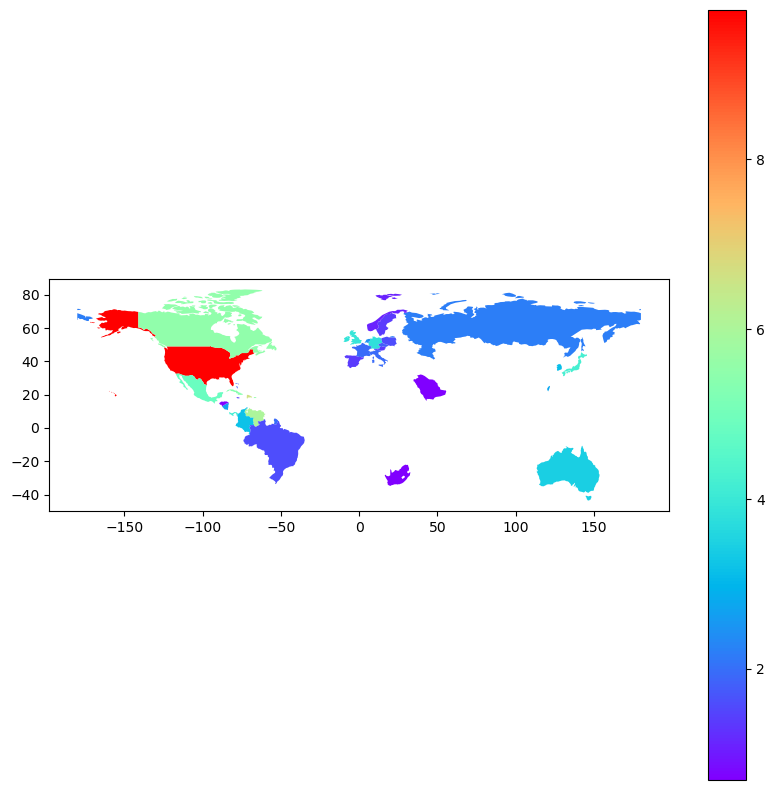

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
geo.plot(ax=ax, column='log_freq', cmap='rainbow', legend=True)

In [20]:
"""import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = df_all_countries_greater['ISO'],
    z = df_all_countries_greater['log_freq'],
    text = df_all_countries_greater['Country'],
    colorscale = 'Ice',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Log_Frequency of Players born in Country',
))

fig.update_layout(
    width=10,
    height=10,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)
static_image = fig.to_image(format='jpg')
fig.write_image("../images/img1.jpg")
"""

'import plotly.graph_objects as go\n\nfig = go.Figure(data=go.Choropleth(\n    locations = df_all_countries_greater[\'ISO\'],\n    z = df_all_countries_greater[\'log_freq\'],\n    text = df_all_countries_greater[\'Country\'],\n    colorscale = \'Ice\',\n    autocolorscale=False,\n    reversescale=True,\n    marker_line_color=\'darkgray\',\n    marker_line_width=0.5,\n    colorbar_title = \'Log_Frequency of Players born in Country\',\n))\n\nfig.update_layout(\n    width=10,\n    height=10,\n    geo=dict(\n        showframe=False,\n        showcoastlines=False,\n        projection_type=\'equirectangular\'\n    )\n)\nstatic_image = fig.to_image(format=\'jpg\')\nfig.write_image("../images/img1.jpg")\n'

__Exercise 2__

We will use the [lichess](https://lichess.org/api) API to retrieve some information about the current state of chess in the world. In order to answer below questions, make precise and economical requests. You may use:
```
import requests
import json
import pandas

from datetime import datetime
```

In [21]:
import requests
import json
import pandas
from datetime import datetime as dt

__(a)__ What is the real name of the leader of the blitz leaderboard? 

In [22]:
url = 'https://lichess.org/api/player/top/1/blitz'
response = requests.get(url)
username = response.json()['users'][0]['username']

response2 = requests.get(f"https://lichess.org/api/user/{username}")
first_name = response2.json()['profile']['firstName']
last_name = response2.json()['profile']['lastName']

print(f"The real name of the top 1 player in blitz chess is {first_name}, {last_name}")

The real name of the top 1 player in blitz chess is Vladislav, Artemiev


__(b, i)__ Get the username of the last player that played a rapid game against user `athena-pallada`. __(ii)__ In all games against this user, how many times did `athena-pallada` win? _(Provide code that answers the question in case more than just a single game is returned)_

In [23]:
#Request the information
url = 'https://lichess.org/api/games/user/athena-pallada'
response = requests.get(url, params={'max': '1',
                                     'perfType':'rapid'},
                             headers={"Accept":"application/x-ndjson"})

In [24]:
#Turn it into json and start to filter until I find opponent
game = response.json()
opponent = game['players']['black']['user']['name']
#print the username
print(f"The last player that played a rapid game against user athena-pallada is {opponent}")

The last player that played a rapid game against user athena-pallada is Bacio129


In [25]:
response = requests.get(url, params = {"vs": f"{opponent}"},
                             headers={"Accept":"application/x-ndjson"})
json_data = [json.loads(line) for line in response.iter_lines(decode_unicode=True) if line]


In [26]:
wins = 0
for i in np.arange(2):
    winner = json_data[i]['winner']
    if json_data[i]['players'][f"{winner}"]['user']['name'] == "athena-pallada":
        wins += 1
print(f"athena-pallada won {wins} times against Bacio129")

athena-pallada won 2 times against Bacio129


__(c)__ Consider the top ten players in the bullet leaderboard. __(i)__ Which player has the most bullet games overall? __(ii)__ Which player has played the most bullet games relative to account age in days? __(iii)__ Which player has the worst win-to-loss ratio over all formats?

In [27]:
#Create empty dataframe to store data
df_top_ten = pd.DataFrame({'UserName':[],'Games':[]})
#get top 10 blitz players
url = "https://lichess.org/api/player/top/10/blitz"
response = requests.get(url)
response.json()

for i in np.arange(10):
    username = response.json()['users'][i]['id']
    url2 = f"https://lichess.org/api/user/{username}"
    response2 = requests.get(url2)
    account_age = (pd.to_datetime('now') - pd.to_datetime(response2.json()['createdAt'], unit='ms')).days
    wins = response2.json()['count']['win']
    loss = response2.json()['count']['loss']
    draw = response2.json()['count']['draw']
    dictionary = pd.Series({'UserName':username, 'Games':response2.json()['perfs']['blitz']['games'], 'Account_Age':account_age,
                            'Wins':wins, 'Loss':loss, 'Draws':draw })
    df_top_ten = pd.concat([df_top_ten, dictionary.to_frame().T], ignore_index=True)

name = df_top_ten.sort_values(by='Games', ascending=False).iloc[0,0]
num_games = df_top_ten.sort_values(by='Games', ascending=False).iloc[0,1]
print(f"The person with the highest number of blitz games in the top 10 leader board is {name}, with {num_games} games")

The person with the highest number of blitz games in the top 10 leader board is athena-pallada, with 7669 games


In [28]:
df_top_ten['games/age'] = df_top_ten['Games']/df_top_ten['Account_Age']
name = df_top_ten.sort_values(by='games/age', ascending=False).iloc[0,0]
ratio = df_top_ten.sort_values(by='games/age', ascending=False).iloc[0,3]
print(f"The person with the most games relative to their age is {name}, with a ratio of {ratio}")

The person with the most games relative to their age is lintchevski_daniil, with a ratio of 1440


In [29]:
df_top_ten['win/loss'] = df_top_ten['Wins']/df_top_ten['Loss']
name = df_top_ten.sort_values(by='win/loss', ascending=False).iloc[0,0]
ratio = df_top_ten.sort_values(by='win/loss', ascending=False).iloc[0,6]
print(f"The person with the highest win/loss ratio is {name}, with a ratio of {ratio}")

The person with the highest win/loss ratio is konevlad, with a ratio of 1.2036516853932584


__(d)__ Get all games from user `manwithavan`. Group them by opening and print the ten most popular. 

In [30]:
url = 'https://lichess.org/api/games/user/manwithavan'
response = requests.get(url, params = {'opening':True}, headers = {"Accept":"application/x-ndjson"})
json_data = [json.loads(line) for line in response.iter_lines(decode_unicode=True) if line]

In [31]:
opening_list = []
for i in np.arange(len(json_data)):
    try:
        opening_list.append(json_data[i]['opening']['name'])
    except:
        pass

opening = pd.DataFrame(opening_list, columns=['openings'])

In [32]:
top_openings = pd.DataFrame(opening.value_counts())
top_openings.head(10)

,count
openings,
Nimzo-Larsen Attack: Modern Variation,7
Van't Kruijs Opening,7
Mieses Opening,6
Pirc Defense,6
Nimzo-Larsen Attack,5
Zukertort Opening: Kingside Fianchetto,5
Modern Defense,5
Queen's Pawn Game,5
Zukertort Opening: Queenside Fianchetto Variation,5
